### Dataset

In [1]:
!pip install ucimlrepo

#### the libraries

In [169]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings

## **Data Preprocessing & Cleaning**

In [113]:
heart_disease = fetch_ucirepo(id=45)
input = heart_disease.data.features
target = heart_disease.data.targets
C1= ['cp',  'restecg', 'slope', 'ca', 'thal']
C2=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_clean = input.copy()
invalid_zero_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

for col in invalid_zero_cols:
    X_clean.loc[X_clean[col] == 0, col] = np.nan


X_clean = X_clean.fillna(X_clean.median(numeric_only=True))
in_encoded = pd.get_dummies(X_clean, columns=C1,prefix=C1 , drop_first=True)
scaler = StandardScaler()
in_scaled = scaler.fit_transform(in_encoded)
in_scaled = pd.DataFrame(in_scaled, columns=in_encoded.columns,index=in_encoded.index)
print(in_scaled.shape)


(303, 20)


### viusalization

<Figure size 1200x800 with 0 Axes>

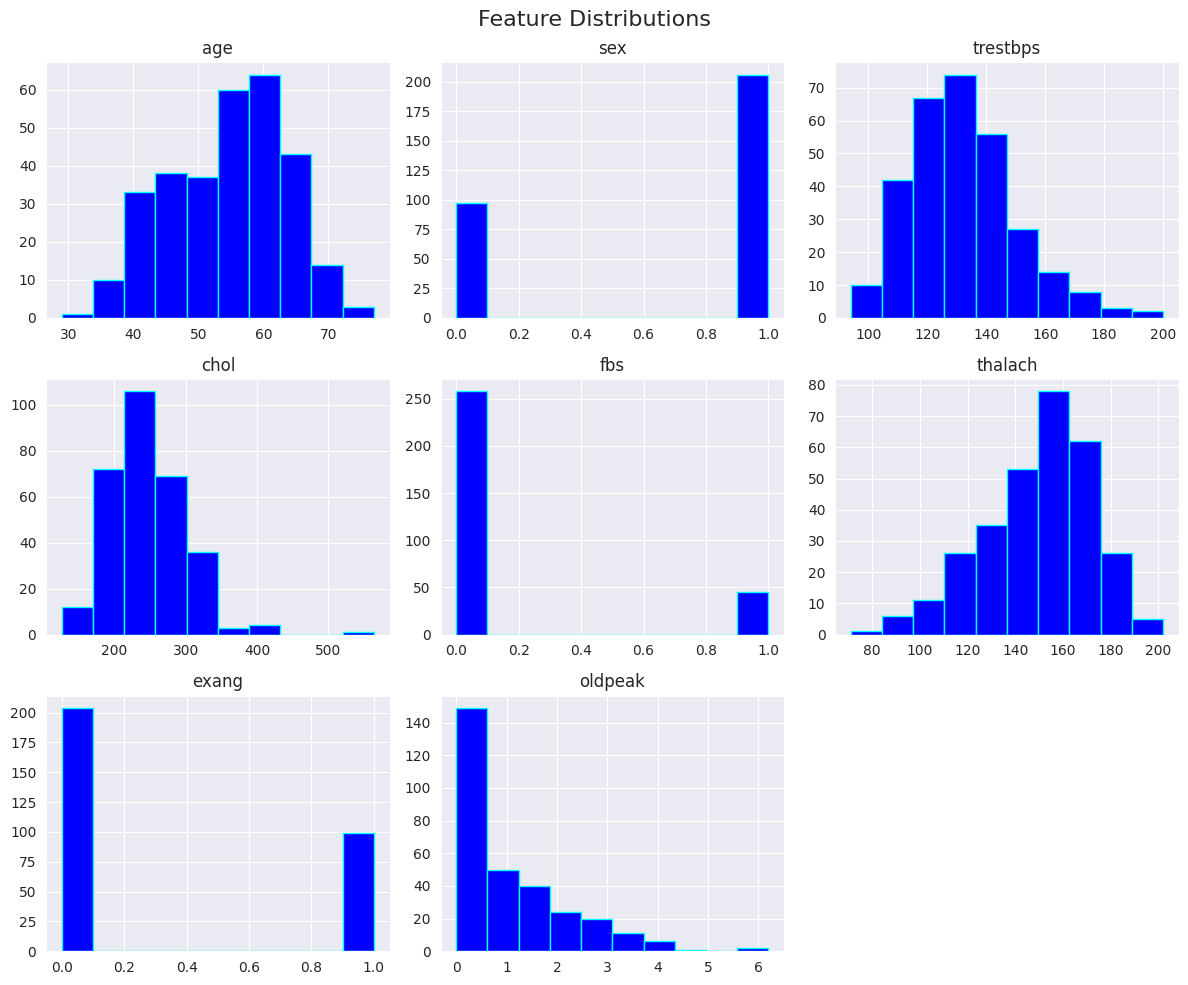

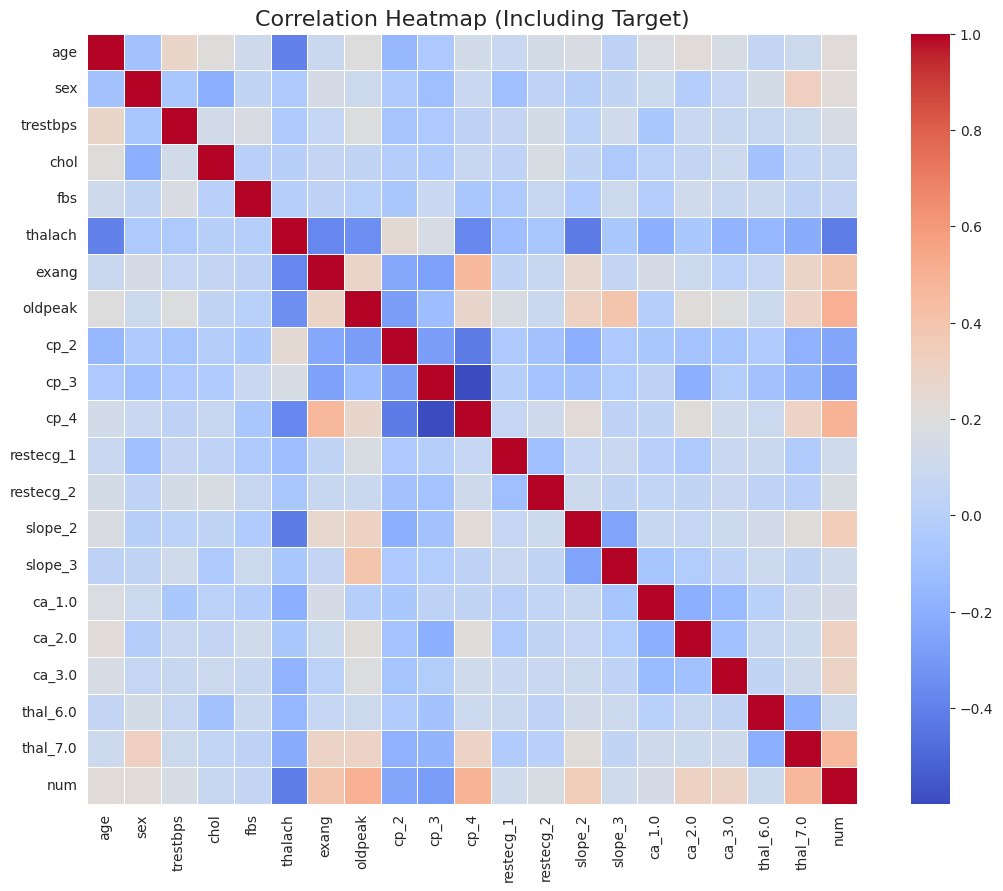

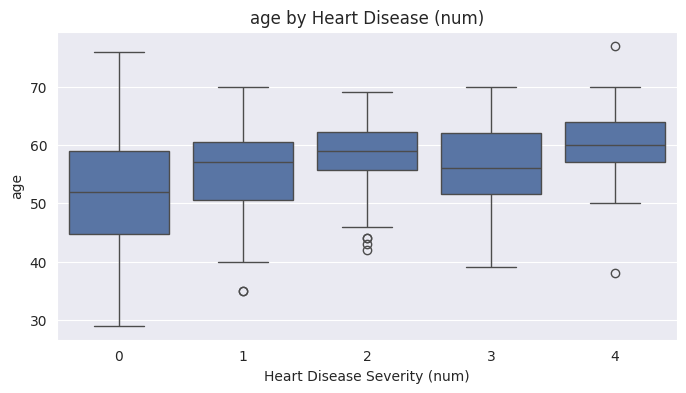

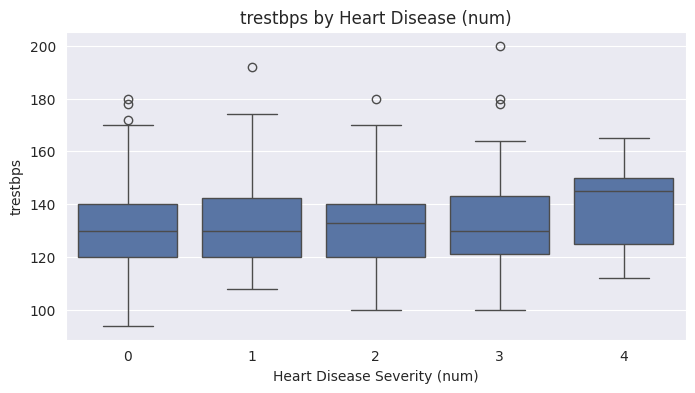

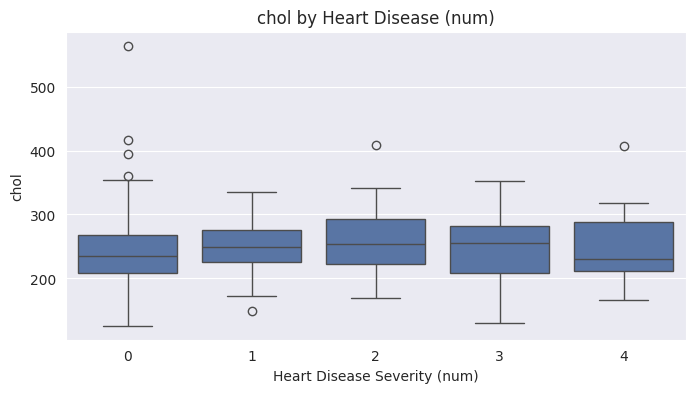

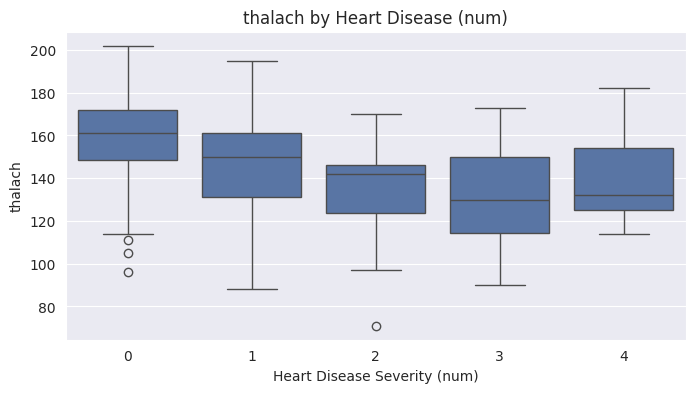

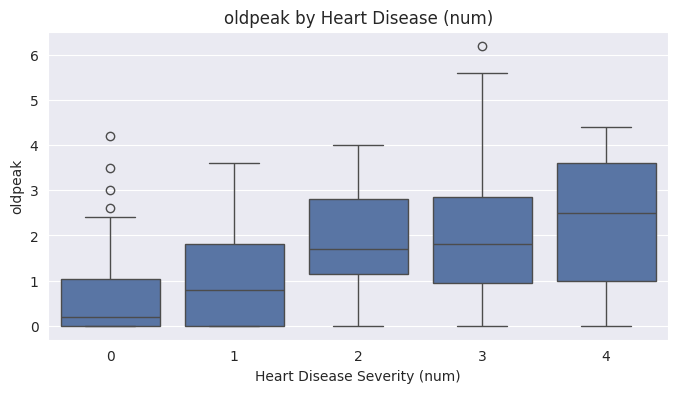

In [103]:
# histogram
plt.figure(figsize=(12, 8))
in_encoded.hist( figsize=(12, 10), color='blue', edgecolor='cyan')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()
conct_plot = pd.concat([in_encoded, target], axis=1)
copy_cont = conct_plot.copy()
corr = conct_plot.corr()
# heat map
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap (Including Target)", fontsize=16)
plt.show()
# boxplots
for col in C2:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='num', y=col, data=copy_cont)
    plt.title(f'{col} by Heart Disease (num)')
    plt.xlabel('Heart Disease Severity (num)')
    plt.ylabel(col)
    plt.show()